In [3]:
library(ArchR)
library(Seurat)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
library(clusterProfiler)
library(ReactomePA)
library(DOSE)
library(scATACutils)
library(dplyr)
library(readr)
library(ggplot2)
library(org.Mm.eg.db)
library(ggpubr)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [4]:
# Readin all cells excluding doublets and add snapatac umap
Merged.proj2 <- readRDS("./all_cell_4sample_202112//Save-ArchR-Project.rds")
Merged.proj2@sampleColData$ArrowFiles <- c("./all_cell_4sample_202112/ArrowFiles/TP15.arrow",
                                          "./all_cell_4sample_202112/ArrowFiles/TP12.arrow",
                                          "./all_cell_4sample_202112/ArrowFiles/TP13.arrow",
                                          "./all_cell_4sample_202112/ArrowFiles/TP14.arrow")
Merged.proj2@projectMetadata$outputDirectory <- "./all_cell_4sample_202112/"



           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/leetl/sex_differentiation/all_cell_4sample_202112 
samples(4): TP15 TP12 TP13 TP14
sampleColData names(1): ArrowFiles
cellColData names(88): Sample TSSEnrichment ... 13 14
numberOfCells(1): 9494
medianTSS(1): 20.5725
medianFrags(1): 10257

In [22]:
Merged.proj2@cellColData %>% as.data.frame %>% select(Sample,cluster) %>% 
write.csv("./2022Figure/allcell.anno.csv",quote = FALSE)

1 




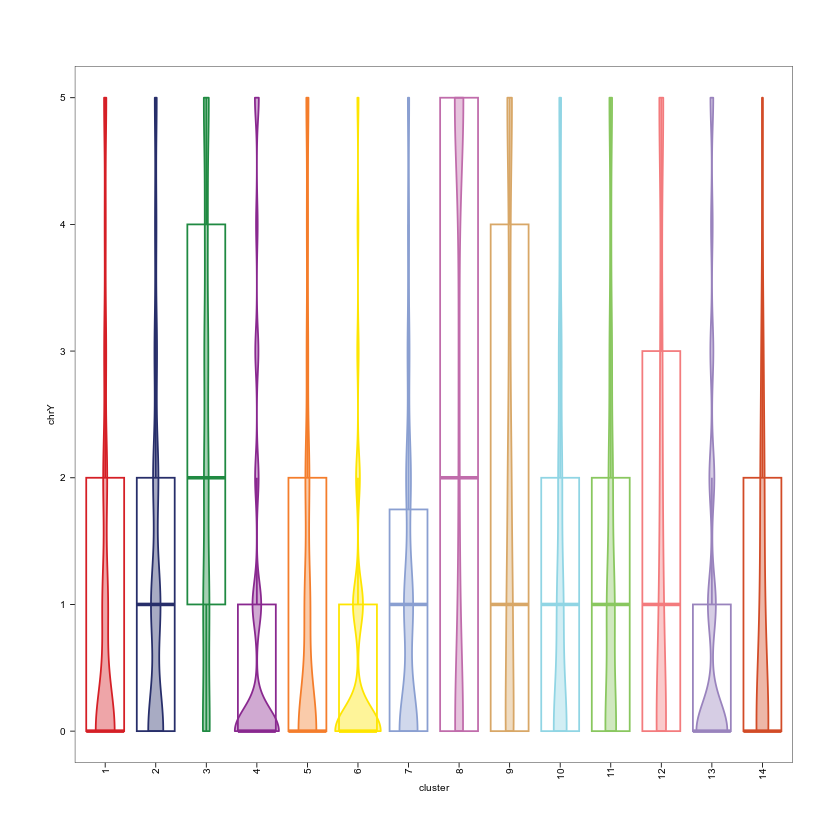

In [15]:
# Examine chrY reads
plotGroups(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
    colorBy = "cellColData", 
    name = "chrY",
    plotAs = "violin",
#  plotAs = "ridges",
    alpha = 0.4,
    log2Norm = TRUE,
    addBoxPlot = TRUE,
    quantCut = c(0.01, 0.9),
     imputeWeights = NULL
   )

Loading required package: viridisLite

Warning message:
“package ‘viridisLite’ was built under R version 4.2.1”
ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f494ebaa09-Date-2023-04-19_Time-13-37-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f494ebaa09-Date-2023-04-19_Time-13-37-58.log



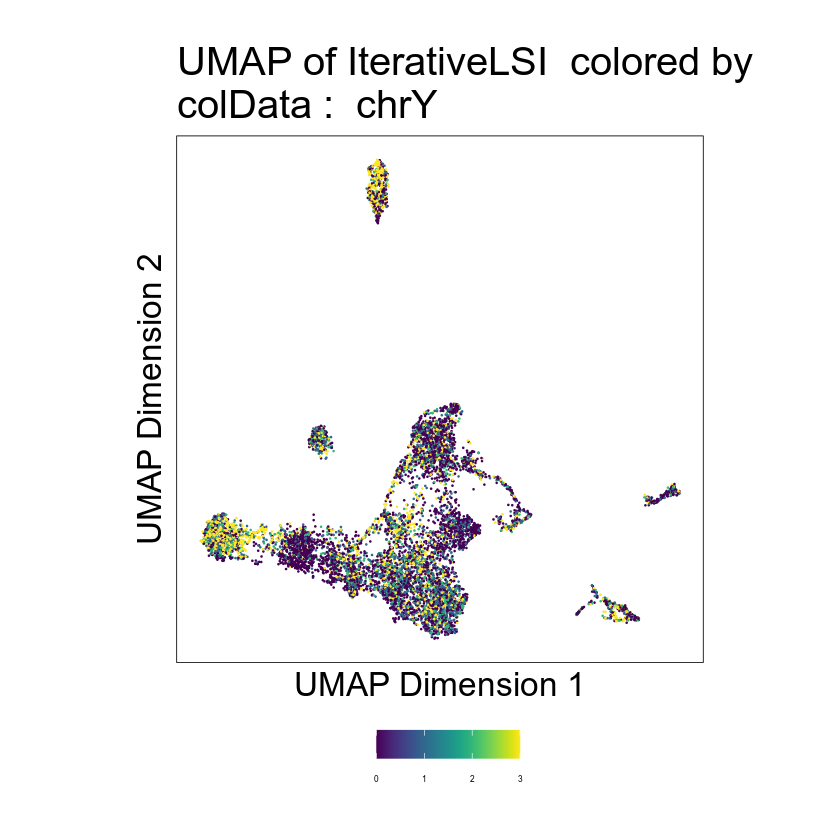

In [4]:
library(viridis)
plotEmbedding(ArchRProj = Merged.proj2,embedding = "UMAP", colorBy ="cellColData", 
              name = c("chrY"),
                    pal= viridis(256, option = "D"),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0, 0.8),
              size=0.1,
       baseSize = 20)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-98fb26b95c4e-Date-2023-04-18_Time-16-20-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-98fb26b95c4e-Date-2023-04-18_Time-16-20-34.log



png 
  2

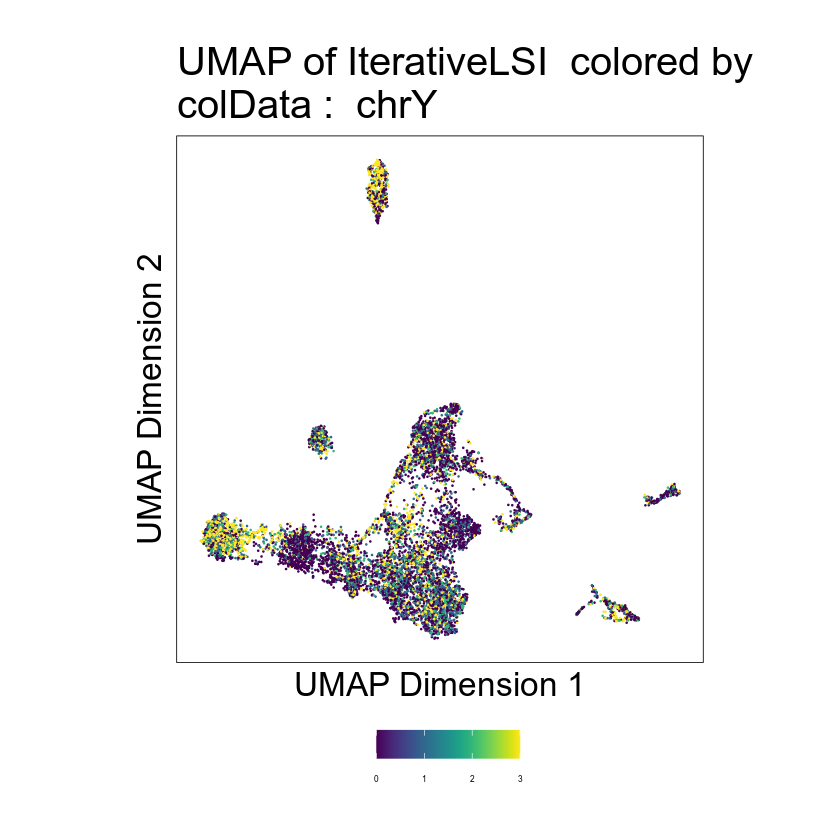

In [5]:
library(viridis)
p <- plotEmbedding(ArchRProj = Merged.proj2,embedding = "UMAP", colorBy ="cellColData", 
              name = c("chrY"),
                    pal= viridis(256, option = "D"),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0, 0.8),
              size=0.1,
       baseSize = 20)
p
pdf(file="./iscience_revision/allcell.chry.UMAP.pdf")
p
dev.off()

In [11]:
h5closeAll()
h5disableFileLocking()
addArchRLocking(locking = TRUE)
Merged.proj2 <- addImputeWeights(Merged.proj2,k=30,ka=4,td=3,sampleCells = 10000,reducedDims = "IterativeLSI",useHdf5 = TRUE)

H5 Locking is not enabled based on 'h5testFileLocking'.
Setting ArchRLocking locking to TRUE.

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-c7781a4847b9-Date-2023-04-19_Time-14-11-07.log
If there is an issue, please report to github with logFile!

2023-04-19 14:11:07 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [ ]:
## plot marker peaks

In [42]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = Merged.proj2, 
    useMatrix = "PeakMatrix", 
    groupBy = "cluster",
     normBy = "ReadsInTSS",
    #original k = 200
    k = 200,
#     bufferRatio = 1,
    maxCells = 20000,
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon",
    binarize = TRUE,
#     useGroups= usegroups
  useGroups= c("1","2","3","4","5","6","7","11","12","13")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-5a4c3994d008-Date-2023-07-15_Time-18-52-10.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2023-07-15 18:52:12 : Matching Known Biases, 0.015 mins elapsed.

Warning message:
“package ‘nabor’ was built under R version 4.2.1”
2023-07-15 18:52:24 : Computing Pairwise Tests (1 of 10), 0.212 mins elapsed.

Pairwise Test 1 : Seqnames chr1

Pairwise Test 1 : Seqnames chr10

Pairwise Test 1 : Seqnames chr11

Pairwise Test 1 : Seqnames chr12

Pairwise Test 1 : Seqnames chr13

Pairwise Test 1 : Seqnames chr14

Pairwise Test 1 : Seqnames chr15

Pairwise Test 1 : Seqnames chr16

Pairwise Test 1 : Seqnames chr17

Pairwise Test 1 : Seqnames chr18

Pairwise Test 1 : Seqnames chr19

Pairwise Test 1 : Seqnames chr2

Pairwise Test 1 : Seqnames chr3

Pairwise Test 1 : Seqnames chr4

Pairwise Test 1 : Seqnames chr5

Pairwise Test 1 : Seqnames chr6

Pairwise Test 1 : Seqnames chr7

Pairwise Test 1 : S

In [47]:
saveRDS(markersPeaks,"./iscience_revision/markerspeaks.rds")

In [43]:
library(ChIPseeker)   
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
# Chipseeker : all PEAKS
    markerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.1 & Log2FC >= 0.5", returnGR = TRUE)

    useGroup <- list(markerList$"1"[1:500],
                    markerList$"2"[1:500],
markerList$"3"[1:500],
markerList$"4"[1:500],
markerList$"5"[1:500],
markerList$"6"[1:500],
markerList$"7"[1:500],
# markerList$"8"[1:1000],
markerList$"11"[1:500],
markerList$"12"[1:500],
markerList$"13"[1:500]
# #                     markerList[[10]][1:52]
                    )
    names(useGroup) <- c("Mesonephros","Interstitial/stroma 1","Pre-Sertoli","Pre-granulosa","CE",
                        "Invading mesonephric","Interstitial/stroma 2",
#                          "C8",
                         "Steroidogenic progenitors",
                        "Endothelial cells","Erythrocyte progenitors")

    peakAnnoList <- lapply(useGroup, annotatePeak, TxDb=txdb,
                           tssRegion=c(-1000, 1000), verbose=FALSE,annoDb="org.Mm.eg.db")



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [46]:
library(viridis)
library(clusterProfiler)
library(ReactomePA)
library(DOSE)
genes = lapply(peakAnnoList, function(i) unique(as.data.frame(i)$geneId))
names(genes) = sub("_", "\n", names(genes))

In [51]:
compGO <- compareCluster(geneCluster   = genes,
                         fun           = "enrichGO",
                         pvalueCutoff  = 0.01,
                         qvalueCutoff  = 0.01,
                         ont="BP",
                         pAdjustMethod = "BH",
                           OrgDb='org.Mm.eg.db' 
#                            organism = "mouse"
                          )
# dotplot(compKEGG, showCategory = 15, title = "KEGG Pathway Enrichment Analysis")

compGO2 <- simplify(compGO)



In [65]:
compGO2_df <- compGO %>% as.data.frame

In [66]:
table(compGO2_df$Cluster)


              Mesonephros     Interstitial/stroma 1               Pre-Sertoli 
                      151                       171                       206 
            Pre-granulosa                        CE      Invading mesonephric 
                        0                       136                       333 
    Interstitial/stroma 2 Steroidogenic progenitors         Endothelial cells 
                      201                         0                       388 
  Erythrocyte progenitors 
                       52 

In [ ]:
pdf("./iscience_revision//allcell.DAR.GO.202307.pdf",width=9,height=10)
options(repr.plot.height=15,repr.plot.width=15)
dotplot(compGO2, showCategory = 5, title = "GO Enrichment Analysis")+ scale_color_viridis(option = "D",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=4,face="bold"),axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title=element_text(size=4,face="bold"))+scale_y_discrete(position = "right") 
dev.off()

In [40]:
pathToMacs2 <- findMacs2()
Merged.proj2 <- addGroupCoverages(ArchRProj = Merged.proj2, groupBy = "cluster",maxCells = 10000,
       force = TRUE)
Merged.proj2 <- addReproduciblePeakSet(
    ArchRProj = Merged.proj2, 
    maxPeaks = 200000,
    groupBy = "cluster", 
    pathToMacs2 = pathToMacs2,
    peaksPerCell = 10000,
       excludeChr = "chrM",
    force = TRUE 
)

Merged.proj2 <- addPeakMatrix(Merged.proj2)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-98fb5b39d9a0-Date-2023-04-18_Time-22-00-15.log
If there is an issue, please report to github with logFile!

1 (1 of 14) : CellGroups N = 2

2 (2 of 14) : CellGroups N = 3

3 (3 of 14) : CellGroups N = 3

4 (4 of 14) : CellGroups N = 4

5 (5 of 14) : CellGroups N = 4

6 (6 of 14) : CellGroups N = 3

7 (7 of 14) : CellGroups N = 3

8 (8 of 14) : CellGroups N = 3

9 (9 of 14) : CellGroups N = 4

10 (10 of 14) : CellGroups N = 4

11 (11 of 14) : CellGroups N = 3

12 (12 of 14) : CellGroups N = 4

13 (13 of 14) : CellGroups N = 4

14 (14 of 14) : CellGroups N = 2

2023-04-18 22:00:23 : Creating Coverage Files!, 0.128 mins elapsed.

2023-04-18 22:00:23 : Batch Execution w/ safelapply!, 0.128 mins elapsed.

2023-04-18 22:00:23 : Group 1._.TP12 (1 of 46) : Creating Group Coverage File : X1._.TP12.insertions.coverage.h5, 0.128 mins elapsed.

Number of Cells = 1578



ERROR: Error in H5Fcreate(file): HDF5. File accessibility. Unable to open file.


In [36]:
# Add chromvar score 
if("Motif" %ni% names(Merged.proj2@peakAnnotation)){
    Merged.proj2 <- addMotifAnnotations(ArchRProj = Merged.proj2, motifSet = "cisbp", name = "Motif")
}
Merged.proj2 <- addBgdPeaks(Merged.proj2)
Merged.proj2 <- addDeviationsMatrix(
  ArchRProj = Merged.proj2, 
  peakAnnotation = "Motif",
  force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-98fb6a140b4d-Date-2023-04-18_Time-21-55-10.log
If there is an issue, please report to github with logFile!

2023-04-18 21:55:10 : Gettting Motif Set, Species : Mus musculus, 0.006 mins elapsed.

Using version 2 motifs!

2023-04-18 21:55:13 : Finding Motif Positions with motifmatchr!, 0.061 mins elapsed.

peakSet is NULL. You need a peakset to run addMotifAnnotations! See addReproduciblePeakSet!



ERROR: Error: 



In [27]:
enrichMotifs <- peakAnnoEnrichment(
    seMarker = markersPeaks,
    ArchRProj = Merged.proj2,
    peakAnnotation = "Motif",
    #original cut-off : 0.1 / 0.5
    cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
#    cutOff = "FDR <= 0.01 & Log2FC >= 2"
  )

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-98fb3a0c9c04-Date-2023-04-18_Time-21-45-08.log
If there is an issue, please report to github with logFile!



ERROR: Error in getMatches(ArchRProj, peakAnnotation): Name is not in peakAnnotation!


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-597b13bc9e96-Date-2023-07-24_Time-16-51-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-597b13bc9e96-Date-2023-07-24_Time-16-51-57.log



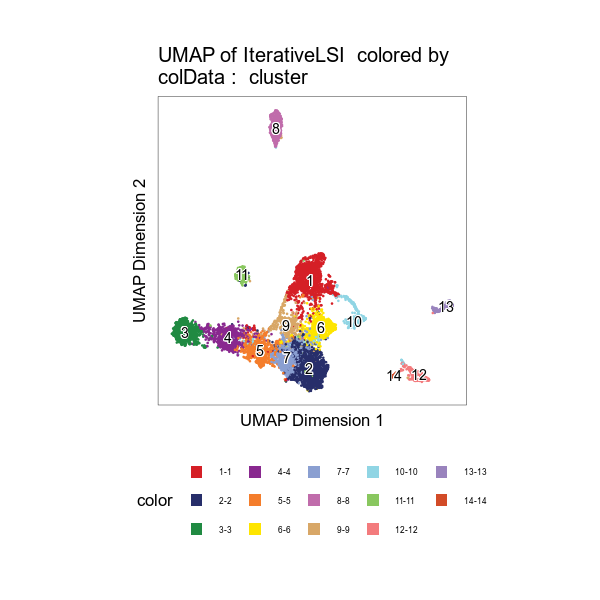

In [26]:
plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("cluster")
)

In [38]:
Merged.proj2 <- saveArchRProject(ArchRProj = Merged.proj2, outputDirectory = "all_cell_4sample_iscience_Revision", load = TRUE)

Warning message in normalizePath(getOutputDirectory(ArchRProj)):
“path[1]="/home/leetl/sex_differentiation/all_cell_4sample_202112": No such file or directory”
Copying ArchRProject to new outputDirectory : /lustre/home/jasonliao/teaching_server/sex_differentiation/all_cell_4sample_iscience_Revision

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /             

In [159]:
saveRDS(Merged.proj2,"./all_cell_4sample_iscience_Revision//Save-ArchR-Project.rds")

## Load data here

In [22]:
Merged.proj2 <- readRDS("./all_cell_4sample_iscience_Revision//Save-ArchR-Project.rds")
h5closeAll()
h5disableFileLocking()
Merged.proj2 <- addImputeWeights(Merged.proj2,k=30,ka=4,td=3,sampleCells = 10000,reducedDims = "IterativeLSI",useHdf5 = FALSE)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-597b7b34257a-Date-2023-07-24_Time-16-39-01.log
If there is an issue, please report to github with logFile!

2023-07-24 16:39:02 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [129]:
Merged.proj2 <- addClusters(
    input = Merged.proj2,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "seurat_clusters",
    resolution = 0.7
,force = TRUE 
)

ArchR logging to : ArchRLogs/ArchR-addClusters-e0f65cf5c0e2-Date-2023-04-08_Time-12-01-54.log
If there is an issue, please report to github with logFile!

Overriding previous entry for seurat_clusters

2023-04-08 12:01:55 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.005 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9494
Number of edges: 339574

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 16
Elapsed time: 1 seconds


2023-04-08 12:02:08 : Testing Biased Clusters, 0.226 mins elapsed.

2023-04-08 12:02:08 : Testing Outlier Clusters, 0.227 mins elapsed.

2023-04-08 12:02:08 : Assigning Cluster Names to 16 Clusters, 0.227 mins elapsed.

2023-04-08 12:02:08 : Finished addClusters, 0.229 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e0f6764ce98a-Date-2023-04-08_Time-12-02-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e0f6764ce98a-Date-2023-04-08_Time-12-02-08.log



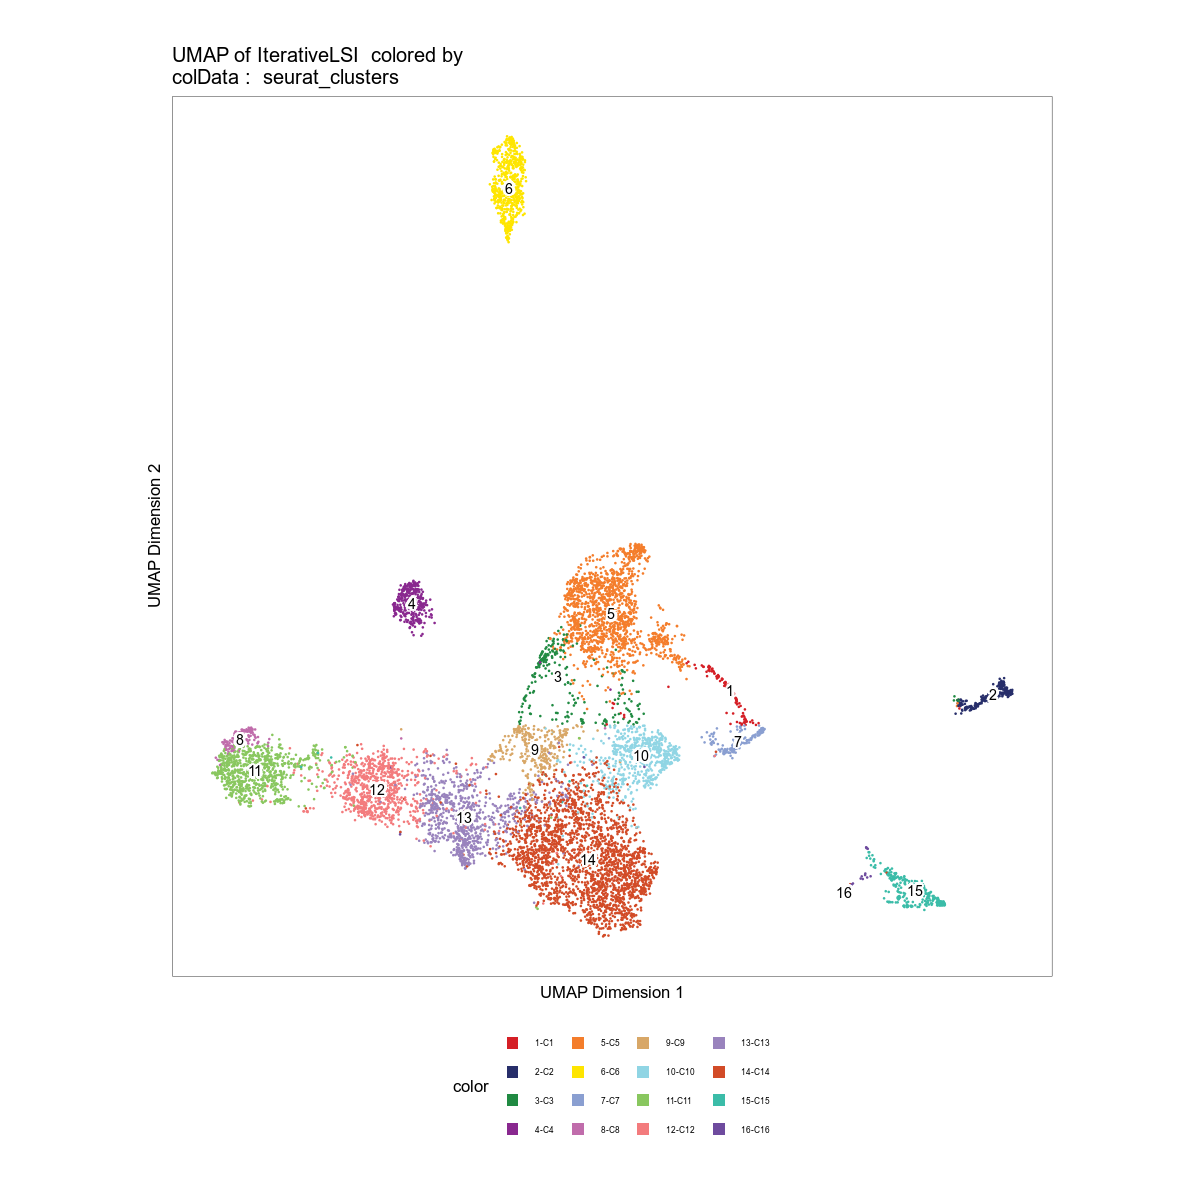

In [130]:
plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("seurat_clusters")
)

In [ ]:
# Integration with scRNA-seq data

In [6]:
seu <- readRDS("./GSE184708_gonad.rds")
seRNA <- readRDS("~/Gonocyte/testis.allcell.scRNAseq.rds")

In [7]:
Idents(seu) <- "Annotation"
seu <- subset(seu,idents = c("PMC","Perivascular"),invert = TRUE)

In [8]:
Idents(seu) <- "time"
Idents(seu) %>% table

.
E10.5 E11.5 E12.5 E13.5 E16.5 
14961 16664 20250 25573 13579 

In [9]:
Idents(seu) <- "time"
seu <- subset(seu,idents = c("E10.5"),invert = TRUE)

In [10]:
seu <- SCTransform(seu, vars.to.regress = "percent.mt", verbose = TRUE)
# seu <- SCTransform(seu,method="glmGamPoi",  verbose = FALSE)
seu <- RunPCA(seu, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, verbose = FALSE)
seu <- FindNeighbors(seu, dims = 1:30, verbose = FALSE)

In [11]:
DefaultAssay(seu) <- "RNA"
seu <- ScaleData(object = seu)

Centering and scaling data matrix



In [ ]:
saveRDS(seu,"./GSE184708_seu_4t_for_integration.rds")

In [28]:
seu <- readRDS("./GSE184708_seu_4t_for_integration.rds")

In [ ]:
Idents(seu) <- "Annotation2"
seu.fil <- subset(seu, idents = c("Pax8 Supporting Like","Adrenosymp."),invert = TRUE)


In [31]:
## Refine cell type
seu@meta.data$Annotation2 <- seu@meta.data$Annotation
Idents(seu) <- "Annotation2"
seu <- RenameIdents(object = seu,"Coelomic Epithelium" = "CE/SE","Surface Epithelium"="CE/SE"
                    )
seu@meta.data$Annotation2 <- Idents(seu)

In [32]:
# Compare cell proportion
library(CellChat)
library(ggplot2)
library(viridis)

In [35]:
biorad <- Merged.proj2@cellColData %>% as.data.frame %>% dplyr::select(Sample,cluster)
biorad_celltype <- biorad %>% mutate(cellypte = case_when(cluster %in% c("1") ~ "Mesonephros",
                                       cluster %in% c("2") ~ "Interstitial/stroma",
                                       cluster %in% c("3") ~ "Pre-Sertoli",
                                       cluster %in% c("4") ~ "Pre-granulosa",
                                       cluster %in% c("5") ~ "CE",
                                       cluster %in% c("6") ~ "Invading Meson.",
                                       cluster %in% c("7") ~ "Interstitial/stroma",
                                       cluster %in% c("8") ~ "Germ cells",
                                       cluster %in% c("9") ~ "Mesonephros",
                                       cluster %in% c("10") ~ "Meson. Tubules",
                                       cluster %in% c("11") ~ "Steroidogenic progenitors",
                                       cluster %in% c("12") ~ "Endothelial cells",
                                       cluster %in% c("13") ~ "Erythrocyte progenitors",
                                       cluster %in% c("14") ~ "Immune cells"                                     
                                    ) )
biorad_celltype <- biorad_celltype %>% mutate(Sample = case_when(Sample %in% c("TP12") ~ "E11.5",
                                      Sample %in% c("TP13") ~ "E12.5",
                                      Sample %in% c("TP14") ~ "E13.5",
                                      Sample %in% c("TP15") ~ "E14.5"
                                    ) )

# change Pre-granulosa at e11.5 to pre-supporting cells

biorad_celltype <- biorad_celltype  %>% mutate(cellypte = if_else(Sample == "E11.5" & cellypte =="Pre-granulosa", "Supporting cell progenitors", cellypte))
biorad_celltype <- biorad_celltype  %>% mutate(cellypte = if_else(Sample == "E11.5" & cellypte =="Pre-Sertoli", "Supporting cell progenitors", cellypte))

In [42]:
# saveRDS(biorad_tb,"./iscience_revision/scatac-seq-proportion.rds")
pdf("./iscience_revision/scatac.proportion.pdf",width =5,height = 4)
options(repr.plot.width = 5,repr.plot.height = 5)
table(Sample = biorad_celltype$Sample,"Celltype" = biorad_celltype$cellypte) %>% as.data.frame -> biorad_tb
ggplot(biorad_tb, aes(fill=Celltype, y=Freq, x=Sample)) + 
    geom_bar(position="fill", stat="identity")+
    scale_fill_manual(values =scPalette(15) )
dev.off()

png 
  2

In [38]:
meta <-seu.fil@meta.data %>% as.data.frame
meta <- meta %>% filter(time != "E16.5") %>% filter(Annotation2 != "Pax8 Supporting Like")


table(sample = meta$time,"Celltype" = meta$Annotation2) %>% as.data.frame -> meta_tb
meta_tb <- meta_tb %>% mutate(Celltype = case_when(Celltype %in% c("Mesonephric Mesenchyme") ~ "Mesonephros",
                                       Celltype %in% c("Interst. Prog.") ~ "Interstitial/stroma",
                                       Celltype %in% c("Sertoli") ~ "Pre-Sertoli",
                                       Celltype %in% c("Granulosa") ~ "Pre-granulosa",
                                       Celltype %in% c("CE/SE") ~ "CE",
                                       Celltype %in% c("Invading Meson.") ~ "Invading Meson.",
                                       Celltype %in% c("Interst. Prog.") ~ "Interstitial/stroma",
                                       Celltype %in% c("Germ Cells") ~ "Germ cells",
                                       Celltype %in% c("Meson. Tubules") ~ "Meson. Tubules",
                                       Celltype %in% c("Fetal Leydig") ~ "Steroidogenic progenitors",
                                       Celltype %in% c("Endothelium") ~ "Endothelial cells",
                                       Celltype %in% c("Blood") ~ "Erythrocyte progenitors",
                                       Celltype %in% c("Immune") ~ "Immune cells" ,
                                                    Celltype %in% c("Pre-supp.") ~ "Supporting cell progenitors" 
                                    ) ) %>% drop_na()



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': object 'seu.fil' not found


In [40]:
# saveRDS(meta_tb,"./iscience_revision/scRNA-seq-proportion.rds")
meta_tb <- readRDS("./iscience_revision/scRNA-seq-proportion.rds")
pdf("./iscience_revision/scrna.proportion.pdf",width =5,height = 4)
ggplot(meta_tb, aes(fill=Celltype, y=Freq, x=sample)) + 
    geom_bar(position="fill", stat="identity")+
    scale_fill_manual(values =scPalette(15) )
dev.off()

png 
  2

In [142]:
seu <- subset(seu,idents = c("PMC","Perivascular"),invert = TRUE)

## Constrained integration

In [30]:
seu@meta.data$Annotation %>% table

.
           Adrenosymp.                  Blood    Coelomic Epithelium 
                    78                   1951                   2585 
           Endothelium           Fetal Leydig             Germ Cells 
                  1366                   1107                  14759 
             Granulosa                 Immune         Interst. Prog. 
                  9937                    281                  16892 
       Invading Meson.         Meson. Tubules Mesonephric Mesenchyme 
                  1914                   1224                   8471 
  Pax8 Supporting Like              Pre-supp.                Sertoli 
                  1127                   2697                   6368 
    Surface Epithelium 
                  5309 

In [31]:
groupList <- SimpleList(
 germ = SimpleList(
        ATAC = Merged.proj2$cellNames[Merged.proj2$cluster %in% c("8")]
,
        RNA = colnames(seu)[seu@meta.data$Annotation %in% c("Germ Cells")]
    ),
     immune = SimpleList(
         ATAC = Merged.proj2$cellNames[Merged.proj2$cluster %in% c("14")]
 ,
         RNA = colnames(seu)[seu@meta.data$Annotation %in% c("Immune")]
     ),
    MT = SimpleList(
        ATAC = Merged.proj2$cellNames[Merged.proj2$cluster %in% c("10")]
,
        RNA = colnames(seu)[seu@meta.data$Annotation %in% c("Meson. Tubules")]
    ),

     M= SimpleList(
        ATAC = Merged.proj2$cellNames[Merged.proj2$cluster %in% c("1")]
,
        RNA = colnames(seu)[seu@meta.data$Annotation %in% c("Mesonephric Mesenchyme")]
    ),
    
    Rest = SimpleList(
        ATAC = Merged.proj2$cellNames[!(Merged.proj2$cluster %in% c("10","14","8","1"))]
,
        RNA = colnames(seu)[!seu@meta.data$Annotation %in% c("Immune","Meson. Tubules","Germ Cells","Mesonephric Mesenchyme")]
    )
)


In [ ]:
Merged.proj2 <- addGeneIntegrationMatrix(
    ArchRProj = Merged.proj2, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "IterativeLSI",
    seRNA = seu,
    addToArrow = FALSE,
    groupList = groupList,
#     groupATAC = "cluster",
    groupRNA = "Annotation2",
    nameCell = "predictedCell_Co_4t2",
    nameGroup = "predictedGroup_Co_4t2",
    nameScore = "predictedScore_Co_4t2",
    force = TRUE
)
options(repr.plot.width = 10,repr.plot.height = 10)
plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    size = 0.2,
    name = c("predictedGroup_Co_4t2" )
#     pal = pal
)



ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-5a4c66c5da14-Date-2023-07-15_Time-19-32-43.log
If there is an issue, please report to github with logFile!

2023-07-15 19:32:44 : Running Seurat's Integration Stuart* et al 2019, 0.011 mins elapsed.

2023-07-15 19:32:44 : Checking ATAC Input, 0.014 mins elapsed.

2023-07-15 19:32:45 : Checking RNA Input, 0.025 mins elapsed.

2023-07-15 19:33:53 : Found 18183 overlapping gene names from gene scores and rna matrix!, 1.163 mins elapsed.

2023-07-15 19:33:53 : Creating Integration Blocks, 1.163 mins elapsed.

2023-07-15 19:33:54 : Prepping Interation Data, 1.185 mins elapsed.

Warning! Not all requested dimsToUse are available! The follow dims were not found in IterativeLSI:
15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30
Unavailable dims will be automatically excluded...

2023-07-15 19:33:58 : Computing Integration in 5 Integration Blocks!, 0 mins elapsed.

2023-07-15 19:33:58 : Block (1 of 5) : Computing Integrati

In [ ]:
plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("predictedScore_Co_4t2" ),
    size = 0.5,

              keepAxis = FALSE,
              plotAs = "points",
    colorLimit =c(0,1))
    

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-c7785e5a7be0-Date-2023-04-19_Time-21-17-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-c7785e5a7be0-Date-2023-04-19_Time-21-17-57.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-c7781013587f-Date-2023-04-19_Time-21-17-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-c7781013587f-Date-2023-04-19_Time-21-17-57.log



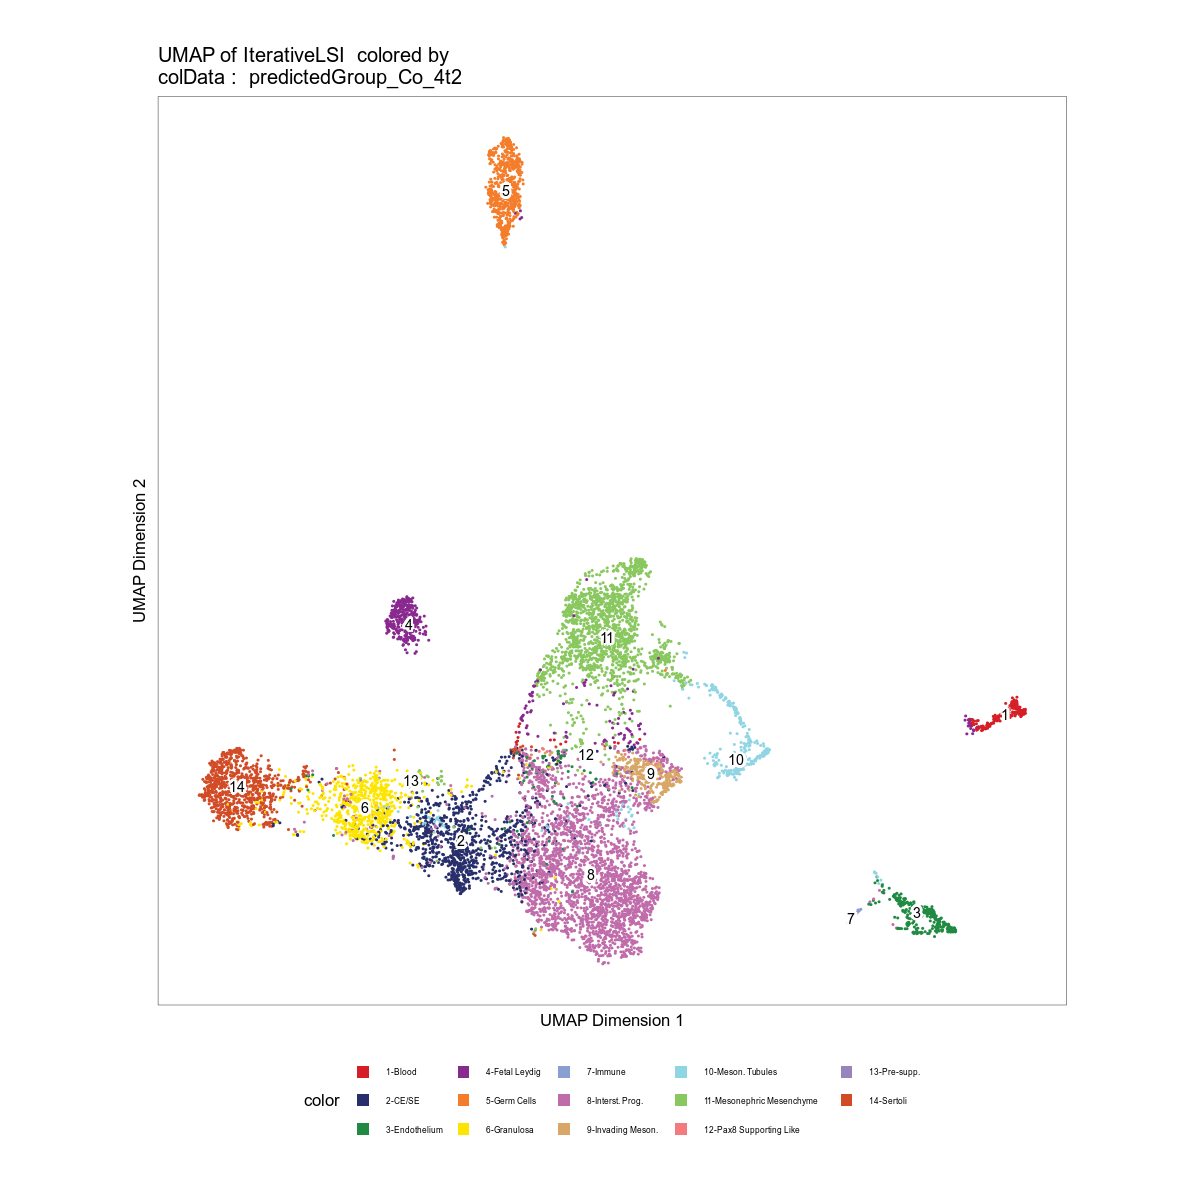

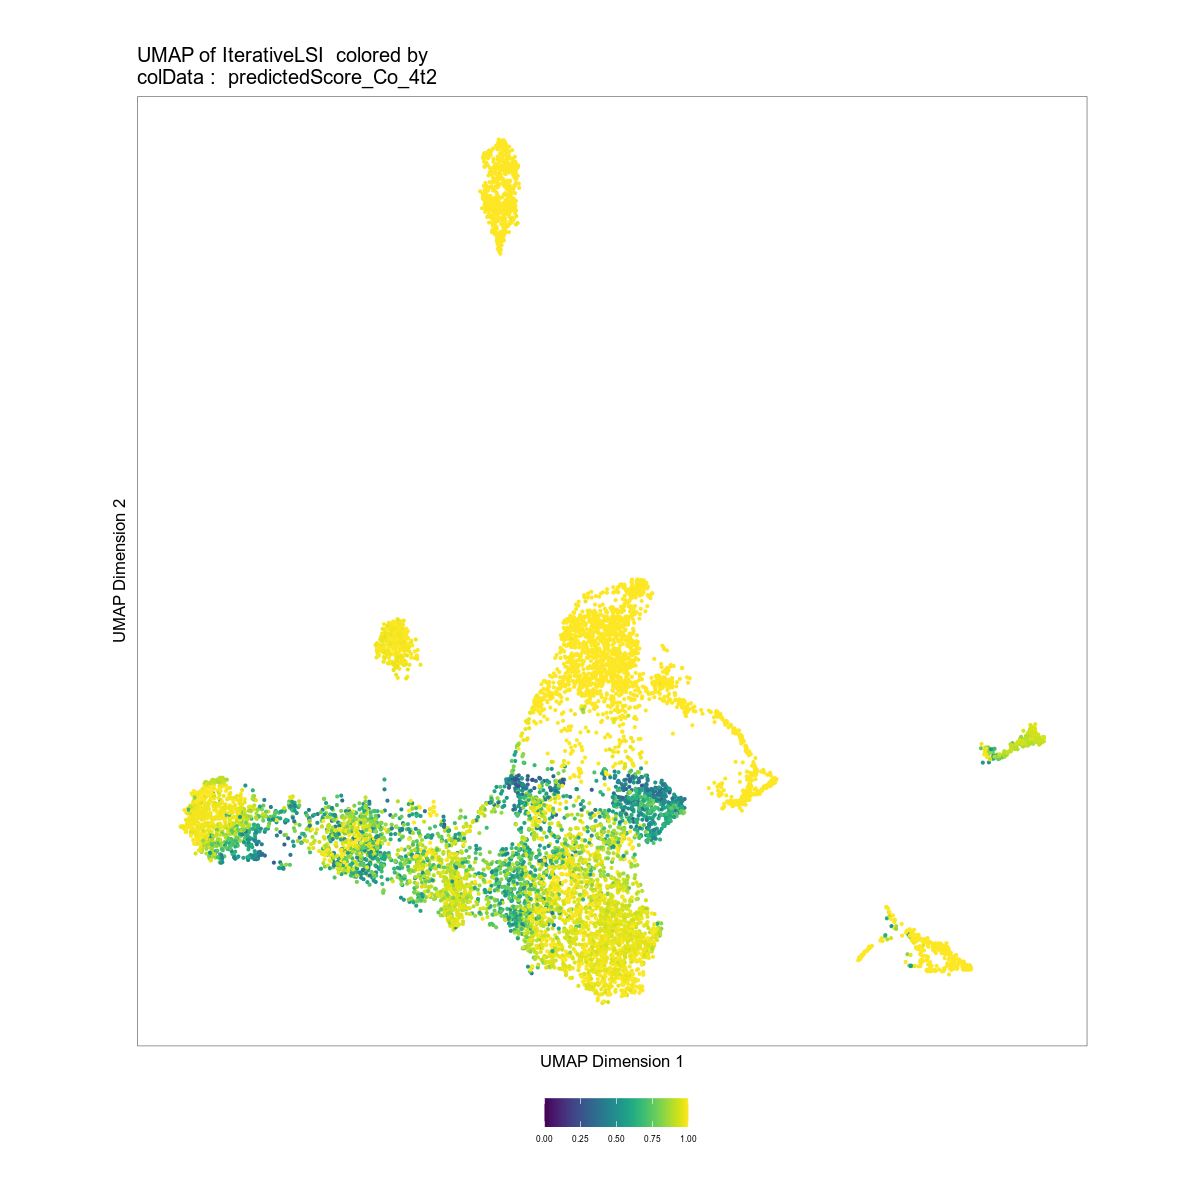

In [37]:
p3 <- plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    size = 0.2,
    name = c("predictedGroup_Co_4t2" )
#     pal = pal
)

p4 <- plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("predictedScore_Co_4t2" ),
    size = 0.5
    
#     pal = pal
)
p4 <- plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("predictedScore_Co_4t2" ),
    size = 0.5,
    quantCut = c(0, 1),
     pal= viridis(256, option = "D"),
              keepAxis = FALSE,
              plotAs = "points",
    colorLimit =c(0,1)
       
    
#     pal = pal
)
p3
p4

In [38]:
library(viridis)

pdf(file="./iscience_revision/newRNA-seq_integration.pdf")
p3
p4
dev.off()

png 
  2

## Coaccessibility analysis

In [36]:
Merged.proj2 <- addCoAccessibility(
    ArchRProj = Merged.proj2,
    reducedDims = "IterativeLSI"
)

cA <- getCoAccessibility(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = TRUE
)

Merged.proj2 <- addPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    reducedDims = "IterativeLSI"
)

p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = TRUE
)
p2g.df <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = FALSE
)


ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-31d4298e9779-Date-2022-01-25_Time-10-19-40.log
If there is an issue, please report to github with logFile!

Filtering 20 dims correlated > 0.75 to log10(depth + 1)

2022-01-25 10:19:41 : Computing KNN, 0.006 mins elapsed.

2022-01-25 10:19:41 : Identifying Non-Overlapping KNN pairs, 0.007 mins elapsed.

2022-01-25 10:19:43 : Identified 498 Groupings!, 0.038 mins elapsed.

2022-01-25 10:19:44 : Computing Co-Accessibility chr1 (1 of 21), 0.059 mins elapsed.

2022-01-25 10:19:49 : Computing Co-Accessibility chr2 (2 of 21), 0.135 mins elapsed.

2022-01-25 10:19:53 : Computing Co-Accessibility chr3 (3 of 21), 0.218 mins elapsed.

2022-01-25 10:19:57 : Computing Co-Accessibility chr4 (4 of 21), 0.276 mins elapsed.

2022-01-25 10:20:01 : Computing Co-Accessibility chr5 (5 of 21), 0.35 mins elapsed.

2022-01-25 10:20:06 : Computing Co-Accessibility chr6 (6 of 21), 0.423 mins elapsed.

2022-01-25 10:20:10 : Computing Co-Accessibility chr7 (7

In [320]:
Merged.proj2 <- addPeak2GeneLinks(
   ArchRProj = Merged.proj2,
   reducedDims = "IterativeLSI"
)

p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.5,
    resolution = 1,
    returnLoops = TRUE
)



In [37]:
getPeakSet(Merged.proj2)

GRanges object with 134954 ranges and 12 metadata columns:
    seqnames          ranges strand |     score replicateScoreQuantile
       <Rle>       <IRanges>  <Rle> | <numeric>              <numeric>
  6     chr1 3119452-3119952      * |   2.18034                  0.259
  3     chr1 3410839-3411339      * |   1.80693                  0.049
  2     chr1 3477426-3477926      * |   2.87564                  0.141
  5     chr1 3647585-3648085      * |   2.51612                   0.25
  3     chr1 3670596-3671096      * |   107.859                  0.928
  .      ...             ...    ... .       ...                    ...
  3     chrY   809602-810102      * |   16.4383                   0.68
  3     chrY   825729-826229      * |   24.8151                  0.757
  3     chrY   872751-873251      * |    8.9101                  0.538
  1     chrY 1010337-1010837      * |   38.6227                   0.79
  1     chrY 1245497-1245997      * |   17.9064                  0.599
    groupScoreQuan

In [237]:
p2g.heatmap <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2,
                                   corCutOff = 0.5,
       FDRCutOff = 0.01,
       varCutOffATAC = 0.25,
       varCutOffRNA = 0.4,
                          groupBy = "cluster",
#                           groupBy = "predictedGroup_Un_woharmony",
                          k = 6)
pdf(file="./2022Figure/somaticcell.6cluster.p2g.pdf",width=10,height=6)
p2g.heatmap
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-2bf24e375293-Date-2022-01-07_Time-11-04-29.log
If there is an issue, please report to github with logFile!

2022-01-07 11:04:34 : Determining KNN Groups!, 0.072 mins elapsed.

2022-01-07 11:04:36 : Ordering Peak2Gene Links!, 0.112 mins elapsed.

2022-01-07 11:04:40 : Constructing ATAC Heatmap!, 0.175 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

2022-01-07 11:04:40 : Constructing RNA Heatmap!, 0.18 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-2bf24e375293-Date-2022-01-07_Time-11-04-29.log



png 
  2

In [ ]:
### prepare bigwig files for integrated 5 cluster
cluster.barcode <- data_frame(cellname = Merged.proj2$cellNames,cluster = Merged.proj2@cellColData$predictedGroup_Co,
                             sample = Merged.proj2$Sample)

write.table(cluster.barcode %>% filter(sample == "TP12") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,6,50)),file="./genometrack/TP12.somatic.predictedGroup_Co.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
write.table(cluster.barcode %>% filter(sample == "TP13") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,6,50)),file="./genometrack/TP13.somatic.predictedGroup_Co.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
write.table(cluster.barcode %>% filter(sample == "TP14") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,6,50)),file="./genometrack/TP14.somatic.predictedGroup_Co.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
write.table(cluster.barcode %>% filter(sample == "TP15") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,7,50)),file="./genometrack/TP15.somatic.predictedGroup_Co.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)

In [ ]:
p2g.mtx <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.6,groupBy = "predictedGroup_Co",k = 7,returnMat=TRUE)
saveRDS(p2g.mtx,file="Somatic_cell.addp2g.rds")
p2g.heatmap.df <- p2g.mtx[[3]]@listData %>% as.data.frame %>% dplyr::mutate(cluster = p2g.mtx[[1]][[2]])


## GO analysis

In [407]:

C1.name <- p2g.heatmap.df %>% filter(cluster == "1") %>% dplyr::select(gene) %>% unique()
C2.name <- p2g.heatmap.df %>% filter(cluster == "2") %>% dplyr::select(gene) %>% unique()
C3.name <- p2g.heatmap.df %>% filter(cluster == "3") %>% dplyr::select(gene) %>% unique()
C4.name <- p2g.heatmap.df %>% filter(cluster == "4") %>% dplyr::select(gene) %>% unique()
C5.name <- p2g.heatmap.df %>% filter(cluster == "5") %>% dplyr::select(gene) %>% unique()
C6.name <- p2g.heatmap.df %>% filter(cluster == "6") %>% dplyr::select(gene) %>% unique()
# C7.name <- p2g.heatmap.df %>% filter(cluster == "7") %>% dplyr::select(gene) %>% unique()
# C8.name <- p2g.heatmap.df %>% filter(cluster == "8") %>% dplyr::select(gene) %>% unique()

C1.name <- bitr(C1.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
C2.name <- bitr(C2.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
C3.name <- bitr(C3.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
C4.name <- bitr(C4.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
C5.name <- bitr(C5.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
C6.name <- bitr(C6.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
# C7.name <- bitr(C7.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")
# C8.name <- bitr(C8.name$gene, toType="ENTREZID", fromType="SYMBOL", OrgDb="org.Mm.eg.db")

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C1.name$gene, toType = "ENTREZID", fromType = "SYMBOL", :
“0.76% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C2.name$gene, toType = "ENTREZID", fromType = "SYMBOL", :
“0.52% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C3.name$gene, toType = "ENTREZID", fromType = "SYMBOL", :
“1.19% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C4.name$gene, toType = "ENTREZID", fromType = "SYMBOL", :
“0.85% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C5.name$gene, toType = "ENTREZID", fromType = "SYMBOL", :
“0.3% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-2bf21d95dbe0-Date-2022-01-14_Time-12-30-11.log
If there is an issue, please report to github with logFile!

2022-01-14 12:30:11 : Validating Region, 0.006 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr1 74771892-74785319      + |       22420        Wnt6
  -------
  seqinfo: 21 sequences from mm10 genome


2022-01-14 12:30:11 : Adding Bulk Tracks (1 of 1), 0.007 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

2022-01-14 12:30:12 : Adding Feature Tracks (1 of 1), 0.02 mins elapsed.

2022-01-14 12:30:12 : Adding Loop Tracks (1 of 1), 0.021 mins elapsed.

2022-01-14 12:30:12 : Adding Gene Tracks (1 of 1), 0.023 mins elapsed.

2022-01-14 12:30:12 : Plotting, 0.026 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-2bf21d95dbe0-Date-2022-01-14_Time-12-30-11.log



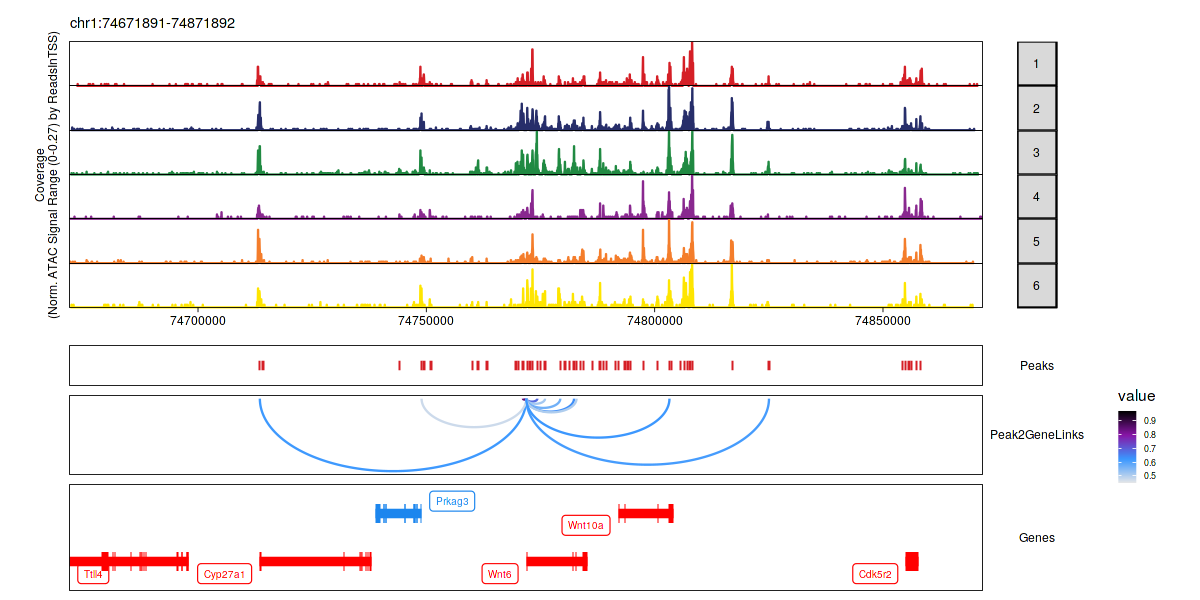

In [415]:
    p <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
    geneSymbol = "Wnt6", 
    upstream = 100000,
    downstream = 100000,
         tileSize = 50,
    loops = getPeak2GeneLinks(Merged.proj2)
)

grid::grid.newpage()
grid::grid.draw(p$Wnt)

In [231]:
# GO analysis of genes in 6 clusters
go_enrich1 <- enrichGO(gene = C1.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)
go_enrich2 <- enrichGO(gene = C2.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)
go_enrich3 <- enrichGO(gene = C3.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)
go_enrich4 <- enrichGO(gene = C4.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)
go_enrich5 <- enrichGO(gene = C5.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)
go_enrich6 <- enrichGO(gene = C6.name$SYMBOL,
#                       universe = names(gene_list),
                      OrgDb = 'org.Mm.eg.db', 
                      keyType = 'SYMBOL',
#                       readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)


In [234]:
library("viridis") 
options(repr.plot.width=10,repr.plot.height=5)
g1 <- dotplot(go_enrich1, showCategory = 15, title = "Cluster 1")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right") 
g2 <- dotplot(go_enrich2, showCategory = 15, title = "Cluster 2")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right")
g3 <- dotplot(go_enrich3, showCategory = 15, title = "Cluster 3")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right")
g4 <- dotplot(go_enrich4, showCategory = 15, title = "Cluster 4")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right")
g5 <- dotplot(go_enrich5, showCategory = 15, title = "Cluster 5")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right")
g6 <- dotplot(go_enrich6, showCategory = 15, title = "Cluster 6")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=10,face="plain"))+scale_y_discrete(position = "right")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existin

In [ ]:
plotPDF(p, "allcell.UMAP.pdf",width=5,height=5)


In [239]:
options(repr.plot.width=25,repr.plot.height=10
       )
library(patchwork)
pdf(file="./2022Figure/somatic.p2g.6cluster.GO.pdf",width=14,height=10)
(g1 / g2 / g3) | (g4 / g5/ g6) 
# | (g7 )
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



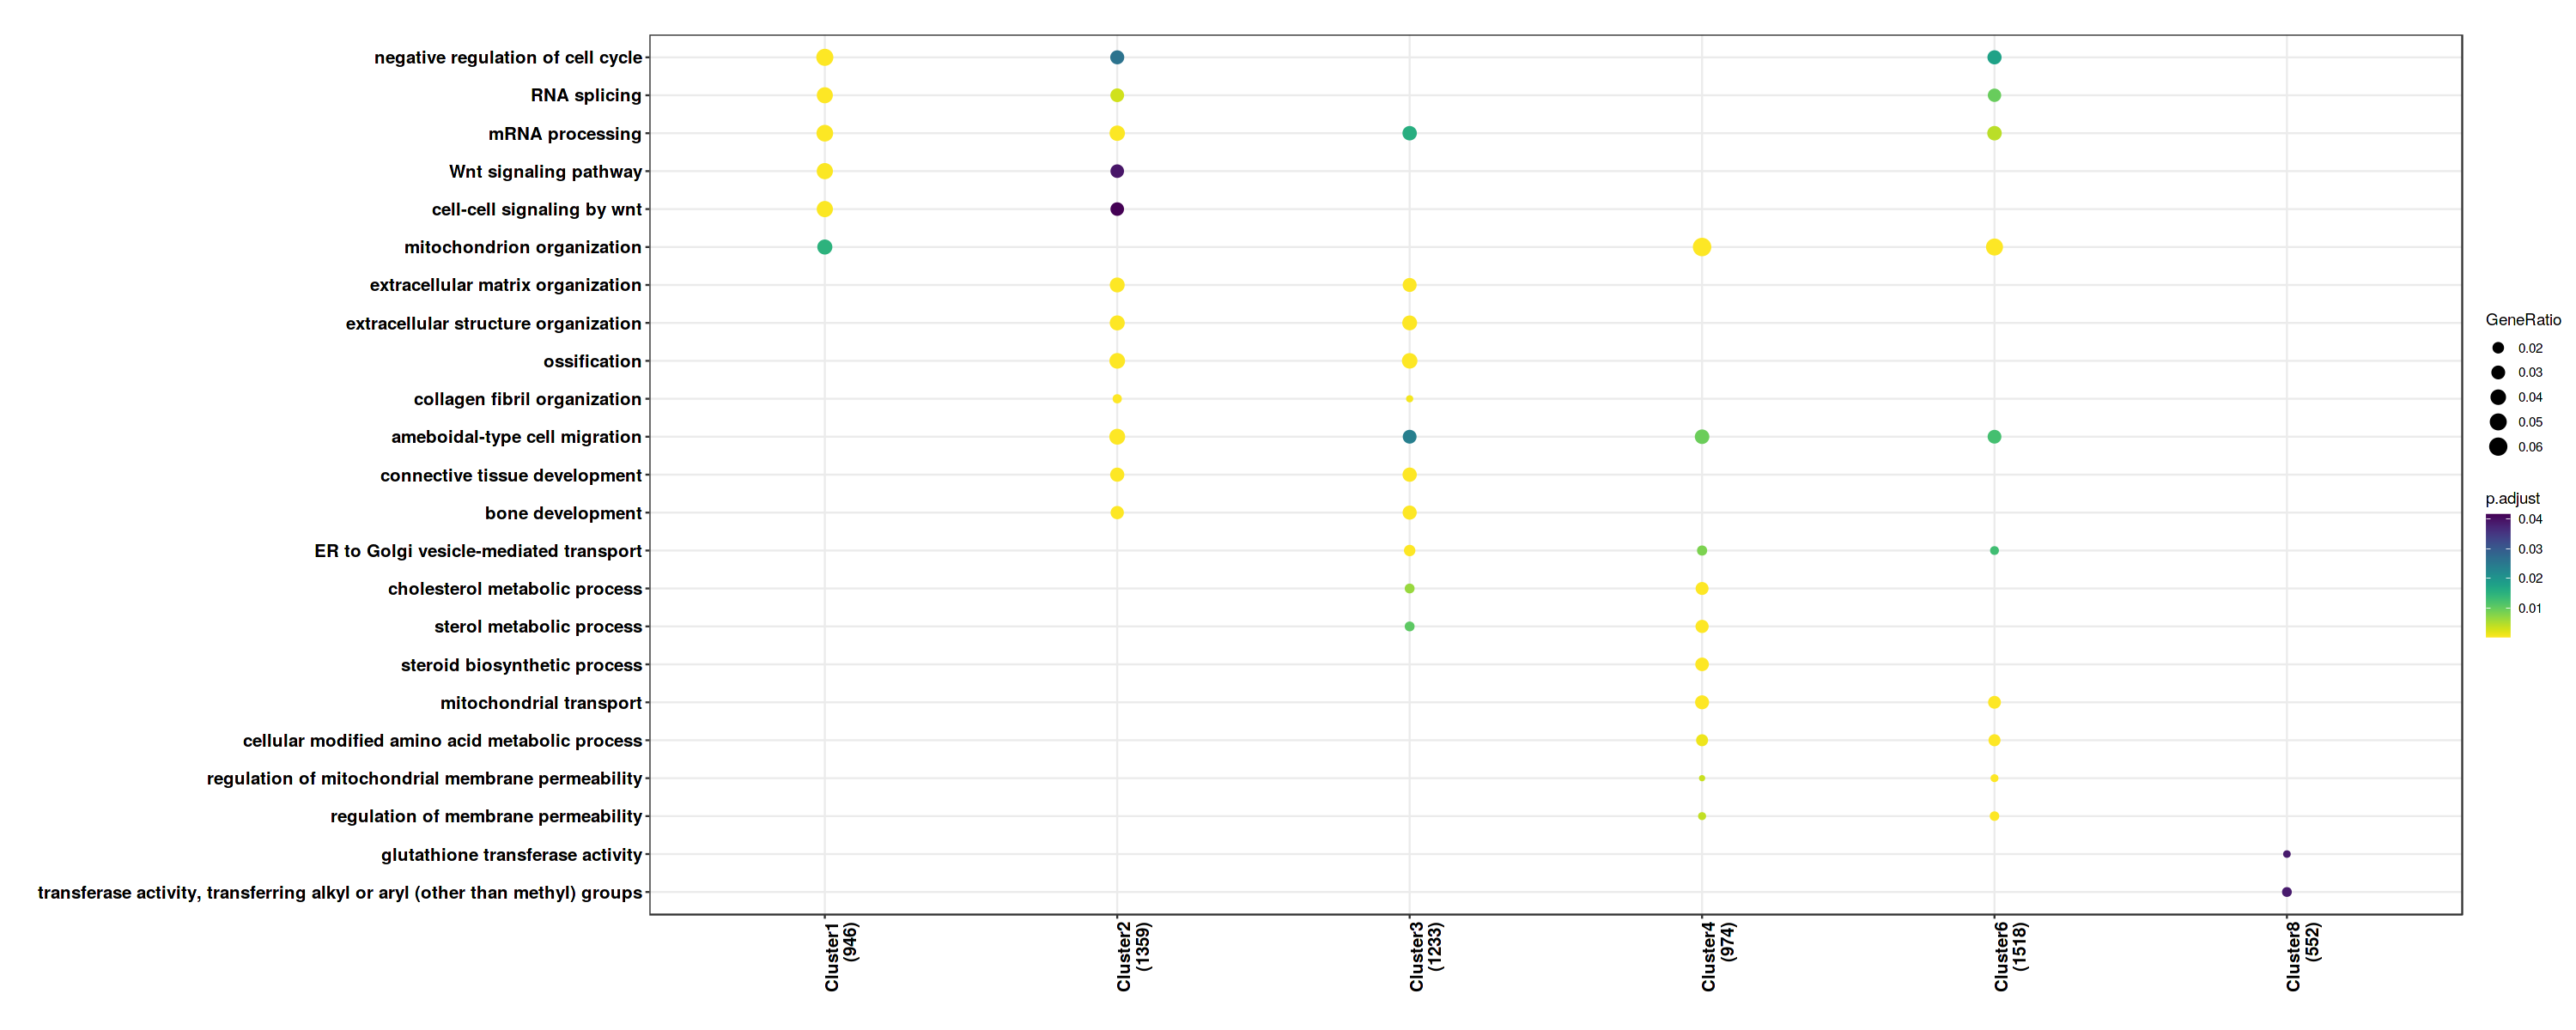

In [241]:
library("viridis") 
# pdf(file="allcell.GO.merged.pdf",width=7, height=5)
merge_result(list("Cluster1"=go_enrich1, "Cluster2"=go_enrich2,"Cluster3"=go_enrich3,"Cluster4"=go_enrich4,"Cluster6"=go_enrich6,"Cluster7"=go_enrich7,"Cluster8"=go_enrich8))  %>%
    dotplot() + scale_color_viridis(option = "D",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=18,face="bold"))
# dev.off()



In [ ]:
# compGO <- compareCluster(geneCluster   = p2g.gene.list,
#                          fun           = "enrichGO",
#                          OrgDb = 'org.Mm.eg.db', 
# #                       keyType = 'SYMBOL',
# #                       readable = T,
#                       ont = "BP",
#                       pvalueCutoff = 0.05, 
#                       qvalueCutoff = 0.10
#                           )

# # dotplot(compKEGG, showCategory = 15, title = "KEGG Pathway Enrichment Analysis")
options(repr.plot.height=10,repr.plot.width=10)
dotplot(compGO, showCategory = 10, title = "enrichGO Enrichment Analysis") +
scale_color_viridis(option = "D",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=18,face="bold"))

In [314]:
p2g.heatmap.addtss.df %>% write.csv("./2022Figure/somatic.p2g.heatmap.6cluster.list.csv")


In [315]:
install.packages("writexl")
library("writexl")
p2g.heatmap.addtss.df %>% write_xlsx("./2022Figure/somatic.p2g.heatmap.6cluster.list.xlsx")

Installing package into ‘/home/leetl/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [310]:
## perpare arcs for each cluster
## add tss region df
tss.peaks <- metadata(p2g.df)[[2]] %>% as.data.frame() %>% mutate(end = end +1)%>% 
mutate(gene = name) %>%
dplyr::select(gene,seqnames:end)
p2g.heatmap.addtss.df <- p2g.heatmap.df %>% inner_join(tss.peaks,by = "gene") 

for (i in p2g.heatmap.addtss.df$cluster) {
p2g.heatmap.addtss.df %>% separate(peak,c("chr1","start1"),sep = ":") %>% 
separate(start1,c("start1","end1"),sep = "-") %>%
filter(cluster == i) %>% dplyr::select(chr1:end1,seqnames:end,Correlation) %>% 
    write_tsv(paste0("./2022Figure/Somaticcell.p2g.heatmap.cluster",i,".arc"),col_names=FALSE)
    }

as.data.frame(p2g[[1]]) %>% mutate(start1=start) %>% mutate(end1=start+1)%>% 
mutate(seqnames1=seqnames) %>% mutate(seqnames2=seqnames) %>% mutate(coaccess = value) %>%
mutate(start2=end) %>% mutate(end2=end+1) %>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2,coaccess) %>% 
write_tsv("./2022Figure//Somaticcell.p2g.arc",col_names=FALSE)

## Positive regulator

In [ ]:
pathToMacs2 <- findMacs2()
Merged.proj2 <- addGroupCoverages(ArchRProj = Merged.proj2, groupBy = "cluster",maxCells = 10000,
       force = TRUE)
Merged.proj2 <- addReproduciblePeakSet(
    ArchRProj = Merged.proj2, 
    maxPeaks = 200000,
    groupBy = "cluster", 
    pathToMacs2 = pathToMacs2,
    peaksPerCell = 10000,
       excludeChr = "chrM",
    force = TRUE 
)

Merged.proj2 <- addPeakMatrix(Merged.proj2)

In [279]:
Merged.proj2 <- addDeviationsMatrix(
  ArchRProj = Merged.proj2, 
  peakAnnotation = "Motif",
  force = TRUE 
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-2bf255d0ff79-Date-2022-01-07_Time-16-00-56.log
If there is an issue, please report to github with logFile!



NULL


2022-01-07 16:00:58 : Batch Execution w/ safelapply!, 0 mins elapsed.

Can not create group. Object with name 'MotifMatrix' already exists.

2022-01-07 16:01:00 : chromVAR deviations TP15 (1 of 4) Schep (2017), 0.019 mins elapsed.

2022-01-07 16:01:22 : TP15 (1 of 4) : Deviations for Annotation 44 of 884, 0.319 mins elapsed.

2022-01-07 16:01:42 : TP15 (1 of 4) : Deviations for Annotation 88 of 884, 0.653 mins elapsed.

2022-01-07 16:01:59 : TP15 (1 of 4) : Deviations for Annotation 132 of 884, 0.941 mins elapsed.

2022-01-07 16:02:25 : TP15 (1 of 4) : Deviations for Annotation 176 of 884, 1.371 mins elapsed.

2022-01-07 16:02:51 : TP15 (1 of 4) : Deviations for Annotation 220 of 884, 1.802 mins elapsed.

2022-01-07 16:03:13 : TP15 (1 of 4) : Deviations for Annotation 264 of 884, 2.176 mins elapsed.

2022-01-07 16:03:37 : TP15 (1 of 4) : Deviations for Annotation 308 of 884, 2.568 mins elapsed.

2022-01-07 16:04:00 : TP15 (1 of 4) : Deviations for Annotation 352 of 884, 2.953 mins elap

In [282]:
getAvailableMatrices(Merged.proj2)

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

In [283]:
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj2, useMatrix = "MotifMatrix", groupBy = "cluster")

seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
#     reducedDims = "Harmony"
)

corGIM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2,
    useMatrix1 = "GeneIntegrationMatrix",
    useMatrix2 = "MotifMatrix",
#     reducedDims = "Harmony"
)

corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGIM_MM$maxDelta <- rowData(seZ)[match(corGIM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

ArchR logging to : ArchRLogs/ArchR-getGroupSE-2bf214bd205d-Date-2022-01-07_Time-16-27-08.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2022-01-07 16:27:08 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2022-01-07 16:27:10 : Finished Group Matrix 1 of 2, 0.037 mins elapsed.

2022-01-07 16:27:10 : Constructing Group Matrix 2 of 2, 0.037 mins elapsed.

2022-01-07 16:27:12 : Finished Group Matrix 2 of 2, 0.066 mins elapsed.

2022-01-07 16:27:12 : Successfully Created Group Matrix, 0.066 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-2bf214bd205d-Date-2022-01-07_Time-16-27-08.log

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-2bf26dc78761-Date-2022-01-07_Time-16-27-14.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatur

In [284]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.05 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.7))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

[1] "Arx"    "Dlx3"   "Dmrt1"  "Esrrb"  "Ets1"   "Evx1"   "Foxl1"  "Gata1" 
 [9] "Gata4"  "Hic2"   "Hlx"    "Hoxa1"  "Hoxa2"  "Hoxa3"  "Hoxb2"  "Hoxc11"
[17] "Hoxc9"  "Hoxd4"  "Lhx1"   "Lhx2"   "Lhx9"   "Mesp1"  "Mesp2"  "Msx2"  
[25] "Nfya"   "Nr1i2"  "Nr5a1"  "Nr6a1"  "Ppara"  "Pparg"  "Sebox"  "Sp1"   
[33] "Tcf21"  "Thra"   "Thrb"   "Uncx"   "Yy1"

In [285]:
corGIM_MM <- corGIM_MM[order(abs(corGIM_MM$cor), decreasing = TRUE), ]
corGIM_MM <- corGIM_MM[which(!duplicated(gsub("\\-.*","",corGIM_MM[,"MotifMatrix_name"]))), ]
corGIM_MM$TFRegulator <- "NO"
#Final version (0.3,0.05,0.7)
corGIM_MM$TFRegulator[which(corGIM_MM$cor > 0.5 & corGIM_MM$padj < 0.05 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.7))] <- "YES"
# Negative correlation
# corGIM_MM$TFRegulator[which(corGIM_MM$cor < -1 & corGIM_MM$padj < 0.1 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.5))] <- "YES"


sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])

[1] "Dmrt1"  "Elf1"   "Elf2"   "Elk3"   "Elk4"   "Emx2"   "Esr2"   "Esrra" 
 [9] "Ets1"   "Fli1"   "Foxl1"  "Gata4"  "Hoxa1"  "Hoxa2"  "Hoxa4"  "Hoxa5" 
[17] "Hoxa6"  "Hoxa7"  "Hoxb2"  "Hoxc5"  "Hoxc6"  "Hoxc9"  "Hoxd4"  "Klf10" 
[25] "Klf11"  "Klf13"  "Klf14"  "Lbx2"   "Lhx1"   "Lhx5"   "Lhx9"   "Lmx1a" 
[33] "Meox1"  "Mesp2"  "Msc"    "Nr4a1"  "Nr5a1"  "Patz1"  "Pbx3"   "Phf21a"
[41] "Sox9"   "Sp2"    "Tcf21"  "Tead3"  "Zfp148"

In [286]:
corGIM_MM$variableTF <- "NO"
corGIM_MM$variableTF[which(corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.7))] <- "only.delta"

In [287]:
postiveTF <- corGIM_MM$GeneIntegrationMatrix_name[corGIM_MM$TFRegulator=="YES"]
variableTF <- corGIM_MM$GeneIntegrationMatrix_name[corGIM_MM$variableTF=="only.delta"]

Warning message:
“Removed 13 rows containing missing values (geom_point).”


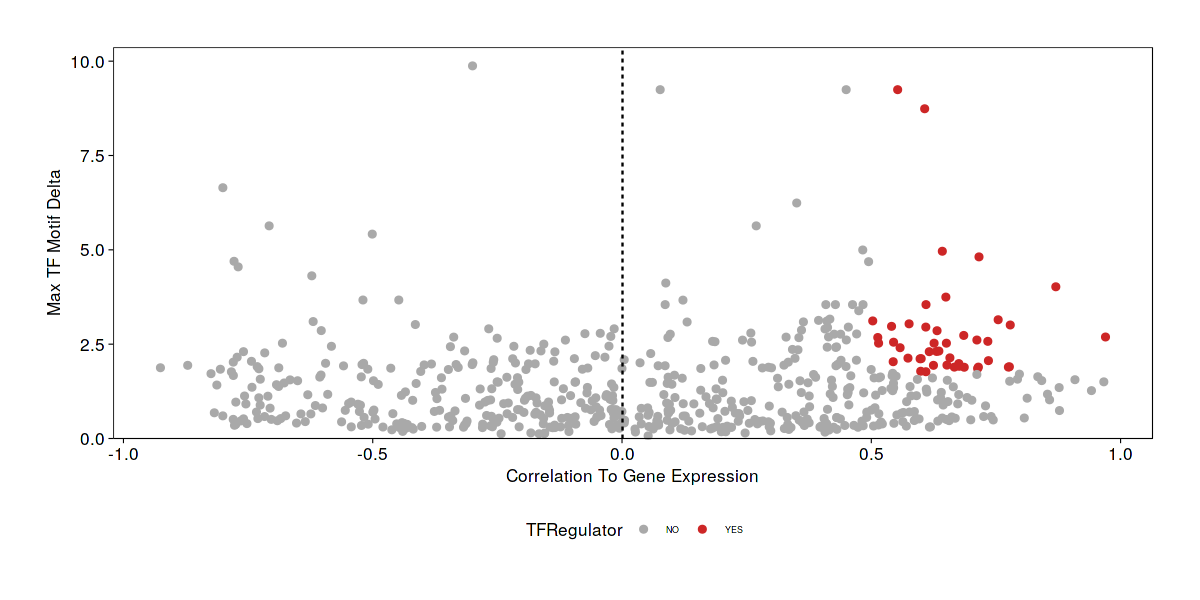

In [288]:
p <- ggplot(data.frame(corGIM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Expression") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGIM_MM$maxDelta)*1.05)
  )

p

In [289]:
markersGIM <- getMarkerFeatures(
    ArchRProj = Merged.proj2, 
    useMatrix = "GeneIntegrationMatrix", 
    maxCells = 5000,
#      useGroups= usegroups,
    groupBy = "cluster",
    k=200,
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-2bf285018fc-Date-2022-01-07_Time-16-28-42.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2022-01-07 16:28:43 : Matching Known Biases, 0.001 mins elapsed.

2022-01-07 16:28:44 : Computing Pairwise Tests (1 of 6), 0.025 mins elapsed.

Pairwise Test 1 : Seqnames chr1

Pairwise Test 1 : Seqnames chr10

Pairwise Test 1 : Seqnames chr11

Pairwise Test 1 : Seqnames chr12

Pairwise Test 1 : Seqnames chr13

Pairwise Test 1 : Seqnames chr14

Pairwise Test 1 : Seqnames chr15

Pairwise Test 1 : Seqnames chr16

Pairwise Test 1 : Seqnames chr17

Pairwise Test 1 : Seqnames chr18

Pairwise Test 1 : Seqnames chr19

Pairwise Test 1 : Seqnames chr2

Pairwise Test 1 : Seqnames chr3

Pairwise Test 1 : Seqnames chr4

Pairwise Test 1 : Seqnames chr5

Pairwise Test 1 : Seqnames chr6

Pairwise Test 1 : Seqnames chr7

Pairwise Test 1 : Seqnames chr8

Pairwise Test 1 : Seqnames chr9

Pairwise Test 1 : Seqna

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-2bf22d5aa9b1-Date-2022-01-07_Time-16-44-51.log
If there is an issue, please report to github with logFile!

Identified 45 markers!



 [1] "Sox9"   "Tcf21"  "Hoxc6"  "Msc"    "Elf2"   "Lbx2"   "Ets1"   "Hoxc9" 
 [9] "Mesp2"  "Phf21a" "Dmrt1"  "Elf1"   "Elk3"   "Pbx3"   "Hoxa5"  "Elk4"  
[17] "Hoxa4"  "Zfp148" "Fli1"   "Klf14"  "Esr2"   "Nr4a1"  "Hoxa2"  "Lmx1a" 
[25] "Gata4"  "Klf13"  "Klf10"  "Hoxc5"  "Lhx9"   "Hoxa7"  "Sp2"    "Esrra" 
[33] "Meox1"  "Hoxb2"  "Hoxa6"  "Lhx5"   "Hoxd4"  "Tead3"  "Nr5a1"  "Emx2"  
[41] "Patz1"  "Foxl1"  "Klf11"  "Hoxa1"  "Lhx1"  


Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-2bf22d5aa9b1-Date-2022-01-07_Time-16-44-51.log



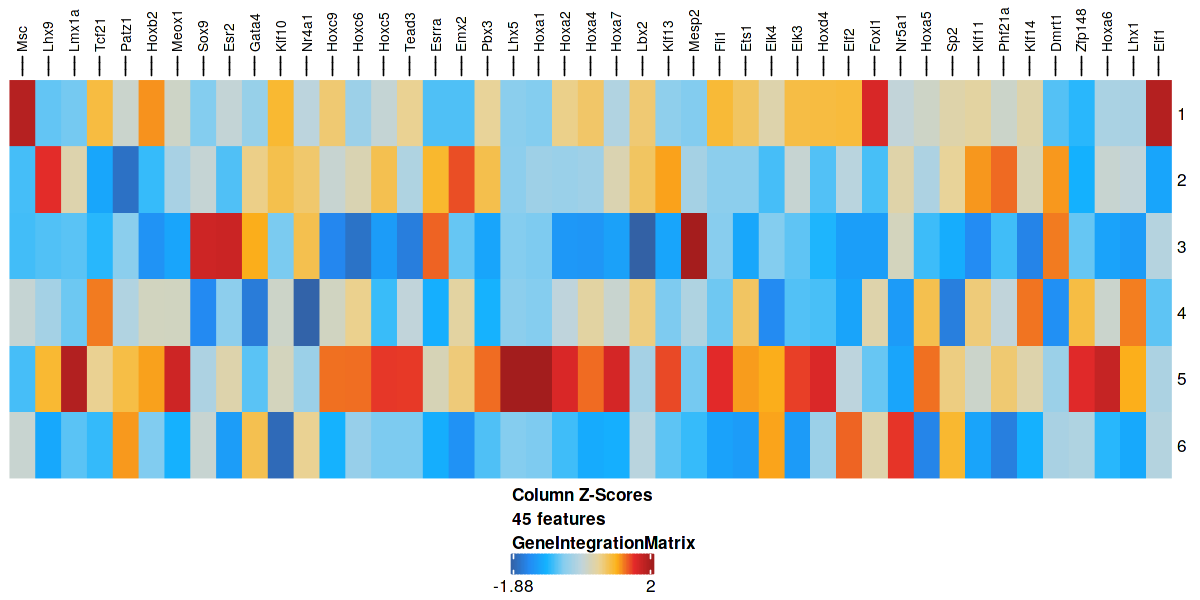

In [302]:
markersGIM.TF <- markersGIM[rowData(markersGIM)$name %in% postiveTF ,]
options(repr.plot.width=10,repr.plot.height=5)
heatmapGIM <- plotMarkerHeatmap(
  seMarker = markersGIM.TF, 
  cutOff = "FDR <= 0.05 ", 
 labelMarkers = postiveTF,
  transpose = TRUE,
    binaryClusterRows = TRUE,
       clusterCols = TRUE,
#     plotLog2FC = TRUE
)
ComplexHeatmap::draw(heatmapGIM, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [306]:
rownames(markersGIM) <- rowData(markersGIM)$name
colData(markersGIM)$celltype <- colnames(markersGIM)
rownames(seZ) <- gsub("_.*","",rowData(seZ)$name)
colData(seZ)$celltype <- colData(seZ)$predictedGroup_Un
saveRDS(markersGIM,file="allcell.markersGIM.rds")
saveRDS(seZ,file="allcell.seZ.rds")
saveRDS(postiveTF,file="allcell.postiveTF.rds")
saveRDS(variableTF,file="allcell.variableTF.rds")

In [ ]:
saveRDS(p2g,file="Somatic_cell.p2g.rds")

In [243]:
sessionInfo()


R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3                            
 [2] BSgenome.Mmusculus.UCSC.mm10_1.4.0       
 [3] BSgenome_1.54.0                          
 [4] rtracklayer_1.46.0                       
 [5] Biostrings_2.54.0                      